In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import vitaldb
import time
from tqdm import tqdm
from datetime import datetime, timedelta


vpath = '/mnt/01_research/07_delirium'
savepath = '/home/painstudy/bsr_pod/vital_addevent'
vlist = os.listdir(vpath)
info = [v for v in vlist if '.vital' not in v][0]
info = pd.read_excel(os.path.join(vpath, info))

vlist = [v for v in vlist if '.vital' in v]
for item in ('ane.start', 'op.start', 'op.end', 'ane.end'):
    info[item] = pd.to_datetime(info[item]) #- timedelta(hours=9)
    info[f'{item}.ts'] = info[item].apply(lambda x: time.mktime(x.timetuple()))
    
len(vlist)

25718

# Loading data

In [ ]:
import pandas as pd
import numpy as np
import os

df_data = pd.DataFrame([], columns=['fileid', 'bis', 'anes', 'anes_type', 'a_num'])

file = 'total-112.pkl'
rayget = pickle.load(open(f'tmp/{file}','rb'))
#rayget2 = np.concatenate((np.array(rayget)[:,0:4], np.array(rayget)[:,5:7]), axis=-1)

for ray in tqdm(rayget):
    for i in range(len(ray[0])):
        df_data = df_data.append({'fileid': ray[0][i], 'bis': ray[1][i], 'anes': ray[2][i], 'bsr': ray[3][i], 'ane_track': np.array(ray[4][i][:,0], dtype=float), 
                                  'bis_track': np.array(ray[4][i][:,1], dtype=float), 'bsr_track': np.array(ray[4][i][:,2], dtype=float), 'anes_type': ray[5][i], 'a_num': ray[6][i]}, ignore_index=True)

# output 추가
df_info = pd.read_csv('info.csv')
df_data['POD'] = df_data['fileid'].apply(lambda x: df_info[df_info['fileid'] == x]['delirium.keyword.new'].values[0])
df_data['intercept'] = 1

# save
pickle.dump(df_data, open('df_data.pkl','wb'))
#df_data.to_csv('df_data.csv')     
df_data

## Loading saved data

In [2]:
import pandas as pd
import numpy as np
import pickle

#df_data = pd.read_csv('df_data.csv')
df_data = pickle.load(open('df_data.pkl', 'rb'))
df_data['intercept'] = 1
df_data

,fileid,bis,anes,anes_type,a_num,ane_track,bis_track,bsr,bsr_track,POD,intercept
0,R10_200311_134656.vital,True,[Datex-Ohmeda/ET_AGENT1],SEVO,1,"[2.0, nan, 2.5999999046325684, nan, 2.79999995...","[49.70000076293945, 48.900001525878906, 49.299...",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
1,A5_190718_075007.vital,True,[Primus/EXP_SEVO],SEVO,1,"[2.0999999046325684, nan, nan, nan, nan, nan, ...","[73.0999984741211, 74.4000015258789, 72.800003...",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
2,R9_200706_074752.vital,True,[Primus/EXP_SEVO],SEVO,1,"[0.800000011920929, nan, nan, nan, nan, nan, n...","[72.0999984741211, 72.4000015258789, 73.5, 74....",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
3,D4_200717_100153.vital,True,[Datex-Ohmeda/ET_AGENT1],SEVO,1,"[1.899999976158142, nan, 1.2000000476837158, 1...","[nan, 45.29999923706055, 45.400001525878906, 4...",[BIS/SR],"[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
4,E5_200205_133523.vital,True,[Primus/EXP_SEVO],SEVO,1,"[1.2000000476837158, nan, nan, nan, nan, nan, ...","[44.70000076293945, 44.70000076293945, 45.2000...",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
...,...,...,...,...,...,...,...,...,...,...,...
11509,A2_191017_101910.vital,True,[Orchestra/PPF20_CE],PPF,1,"[0.2150000035762787, 0.367000013589859, 0.4070...","[97.4000015258789, 97.4000015258789, 97.400001...",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
11510,A5_190104_074655.vital,True,[Primus/EXP_SEVO],SEVO,1,"[0.20000000298023224, nan, nan, nan, nan, nan,...","[nan, nan, nan, nan, nan, 85.0999984741211, 85...",[BIS/SR],"[nan, nan, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, ...",0,1
11511,A4_190411_085050.vital,True,[Datex-Ohmeda/ET_AGENT1],SEVO,1,"[1.600000023841858, nan, 1.2999999523162842, n...","[82.69999694824219, 77.0, 64.80000305175781, 5...",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
11512,A2_191211_113926.vital,True,[Orchestra/PPF20_CE],PPF,1,"[0.2460000067949295, 0.3179999887943268, 0.453...","[97.70000457763672, 97.70000457763672, 97.7000...",[BIS/SR],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1


# Validation

## BSR track

(array([1.151e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

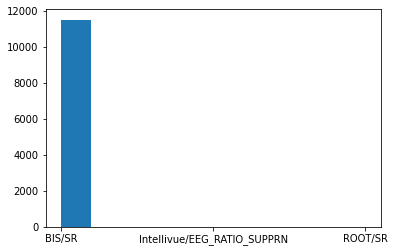

In [90]:
bsr_name = [ele[0] for ele in df_data['bsr'].values]
plt.hist(bsr_name)

In [92]:
bsr_name.count('Intellivue/EEG_RATIO_SUPPRN'), bsr_name.count('ROOT/SR')

(1, 3)

Text(0, 0.5, 'bin')

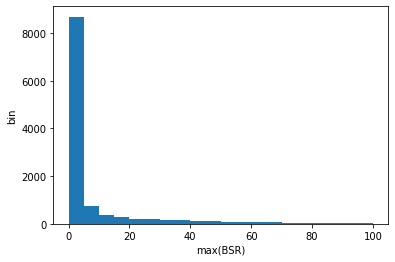

In [117]:
bsr_max = df_data['bsr_track'].apply(lambda x: np.nanmax(x[x<=100])).values

plt.hist(bsr_max[bsr_max<=100], bins=20)
plt.xlabel('max(BSR)')
plt.ylabel('bin')

## Event checking

In [102]:
ane_trks = np.array(['Orchestra/PPF20_CE', 'Primus/EXP_SEVO', 'Primus/EXP_DES','Datex-Ohmeda/ET_AGENT1', 'Datex-Ohmeda/ET_AGENT2'])
ane_thres = np.array([0.2, 0.2, 1, 0.2, 0.2])
bsr_trks = ['Intellivue/EEG_RATIO_SUPPRN', 'BIS/SR', 'ROOT/SR', 'Bx50/BIS_BSR'] 


FILES, BIS, ANES, BSR = [], [], [], []
ANES_TYPE, A_NUM = [], []
NPTRACK = []
list_bsr2, list_short, list_nval, list_non, list_err = [], [], [], [], []

chunk = ['P7_201110_080209.vital']
for v in (chunk):

    vf = vitaldb.VitalFile(os.path.join(vpath, v))
    trks = list(vf.trks.keys())

    # check if bis track exists
    if 'BIS/BIS' not in trks:
        #print(f'{v} - no BIS track')
        list_non.append(v)
        continue

    # track for anesthesia
    a_trks = np.array(trks)[np.isin(trks, ane_trks)]
    anum = len(a_trks)
    if anum == 0:
        continue

    if len(a_trks) > 1:
        # 값이 있는 track을 numpy로 출력
        dat = vf.to_numpy(a_trks, 1)

        # 값이 전부 0인 track은 제거
        a_trks = a_trks[(np.nansum(dat, axis=0)!=0)]
        dat = vf.to_numpy(a_trks, 1)

        # 깨울 때 쓴 마취 트렉은 제거
        idx_start = []
        for i in range(dat.shape[1]):
            val = np.array(dat[:,i], dtype=float)
            idx_start.append(np.where(val>0)[0][0])

        a_trks = [a_trks[np.argmin(idx_start)]]

    a = a_trks[0]

    if 'Datex-Ohmeda' in a:
        if 'Sevoflurane' in vf.to_numpy([f'Datex-Ohmeda/{a[-6:]}_NAME'], 1/10).squeeze():
            a_name = 'SEVO'
        elif 'Desflurane' in vf.to_numpy([f'Datex-Ohmeda/{a[-6:]}_NAME'], 1/10).squeeze():
            a_name = 'DES'
    else:
        a_name = 'PPF' if 'PPF' in a else ('SEVO' if 'SEVO' in a else ('DES' if 'DES' in a else 'NONE'))



    # track for bsr
    b_trks =np.array(trks)[np.isin(trks, bsr_trks)]
    if len(b_trks)>1:
        #print(f'{v} - more than one track for bsr')
        list_bsr2.append(v)
    b = b_trks[0]


    record = vf.to_pandas([a,'BIS/BIS', b], 1, return_datetime=True)
    times = record[record[a] >= ane_thres[ane_trks==a][0]]['Time'] #- timedelta(hours=9)

    # Add Event from ane_trks
    start, end = time.mktime(times.iloc[0].timetuple()), time.mktime(times.iloc[-1].timetuple())
    
    event_recs = []
    event_recs.append({'dt': start, 'val': 'ane.start'})
    event_recs.append({'dt': end, 'val': 'ane.end'})   
    
    # Extract the tracks
    start, end = times.index[0], times.index[-1]
    # 마취 시간이 30분 미만인 경우 제외
    if end - start < 30 * 60 * 1:
        #print(f'{v} - short anesthesia time')
        list_short.append(v)
        continue

    record = record.loc[start:end][[a,'BIS/BIS', b]]
    record['caseNo'] = info[info['fileid'] == v]['caseNo'].iloc[0]


    vf.add_track('EVENT', event_recs, mindisp=0, maxdisp=10)
    vf.to_vital(os.path.join(savepath, v))

In [100]:
time.mktime(times.iloc[0].timetuple())

1604963108.0

In [99]:
end

10281

# Plot

### scatter plot (variable - POD)

Text(0, 0.5, 'POD outcome')

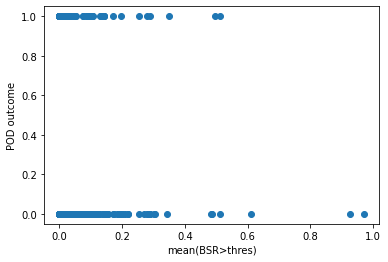

In [28]:
import matplotlib.pyplot as plt

x = df_data['mean_upper40'].values
mask = x < 10000
x = x[mask]
y = df_data['POD'].values
y = y[mask]

plt.scatter(x, y)
plt.xlabel('mean(BSR>thres)')
plt.ylabel('POD outcome')

Text(0, 0.5, 'POD outcome')

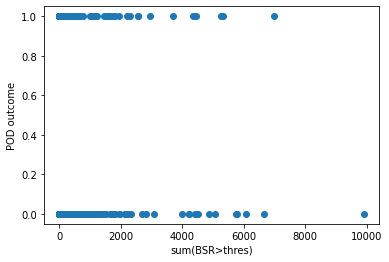

In [47]:
import matplotlib.pyplot as plt

x = df_data['sum_upper40'].values
mask = x < 10000
x = x[mask]
y = df_data['POD'].values
y = y[mask]

plt.scatter(x, y)
plt.xlabel('sum(BSR>thres)')
plt.ylabel('POD outcome')

(array([95.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ]),
 <BarContainer object of 10 artists>)

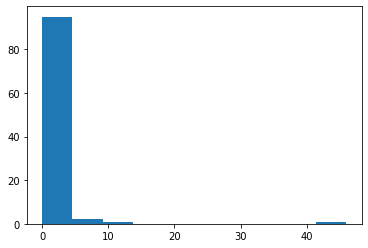

In [56]:
dot_sizes = np.array(dot_sizes)
plt.hist(dot_sizes[dot_sizes<1000])

Text(0, 0.5, 'POD outcome')

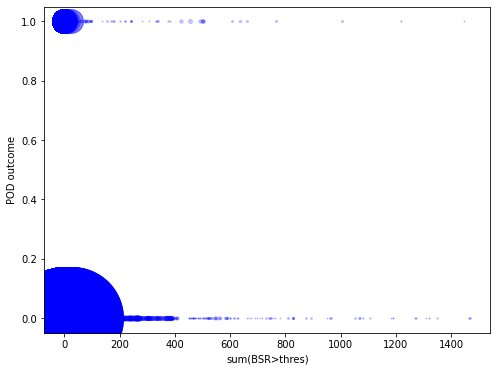

In [82]:
MAX = 1500

x = df_data['sum_upper40'].values
mask = x < MAX
x = x[mask]
y = df_data['POD'].values
y = y[mask]

# Grouping the data points into bins
num_bins = 50
bins_x = np.linspace(0, MAX, num_bins + 1)
bins_y = np.linspace(0, 1, 2)
digitized_x = np.digitize(x, bins_x)
digitized_y = np.digitize(y, bins_y)

# Calculate the size of dots based on the number of points in each bin
dot_sizes = [np.sum((digitized_x == i) & (digitized_y == j)) for i in range(1, num_bins + 1) for j in range(1, 2 + 1)]

# Create a scatter plot with grouped points and adjusted size
plt.figure(figsize=(8, 6))
for i in range(1, num_bins + 1):
    for j in range(1, 2 + 1):
        mask = (digitized_x == i) & (digitized_y == j)
        if np.any(mask):
            plt.scatter(x[mask], y[mask], s=dot_sizes.pop(0), alpha=0.2, c= 'b')
            
plt.xlabel('sum(BSR>thres)')
plt.ylabel('POD outcome')

# Odds ratio

## BSR threshold

In [7]:
import statsmodels.api as sm
from sklearn import metrics
from tqdm import tqdm

#bsr_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bsr_thresholds = np.arange(0,100,5)

odd_ratios = []
cums, outputs = [], []
for idx, row in tqdm(df_data.iterrows(), total = df_data.shape[0]):
    bsr = np.array(row['bsr_track'], dtype=np.float32)
    bsr = bsr[(bsr>=0) & (bsr<=100)]
    
    if len(bsr) < 10:
        print('caseid {}: no bsr'.format(row['fileid']))
        df_data.drop([idx], axis=0, inplace=True)
        continue
    
    # thres 이상의 sum, mean 계산
    for thres in bsr_thresholds:
        df_data.loc[idx,f'sum_upper{thres}'] = (np.nansum(bsr > thres) if np.nansum(bsr > thres) < 600 else 600)
        #df_data.loc[idx,f'sum_upper{thres}'] = (np.nansum(bsr > thres)/60) # if np.nansum(bsr > thres) /60 < 10 else 10)
        #df_data.loc[idx,f'mean_upper{thres}'] = np.nanmean(bsr > thres)
        df_data.loc[idx,f'mean_upper{thres}'] = (np.nanmean(bsr > thres) if np.nanmean(bsr > thres) < 0.4 else 0.4)
        
    # auc 계산
    #mask = np.where((row['bsr_track']>=0) & (row['bsr_track']<=100))[0]
    #y_val = row['bsr_track'][mask]
    
    #df_data.loc[idx, 'bsr_auc'] = metrics.auc(mask, y_val)
        
        
# invalid한 행 제거 (bsr가 전부 nan)
#df_data.dropna(subset=['upper0.1'], how='any', axis=0, inplace=True)

100%|██████████| 11514/11514 [02:54<00:00, 66.06it/s]


In [8]:
for idx, row in tqdm(df_data.iterrows(), total = df_data.shape[0]):
    bsr = np.array(row['bsr_track'], dtype=np.float32)
    bsr = bsr[(bsr>=0) & (bsr<=100)]
    
    df_data.loc[idx, 'sum=0'] = np.nansum(bsr == 0)
    df_data.loc[idx, 'sum>0'] = np.nansum(bsr > 0)
    df_data.loc[idx, 'mean=0'] = np.nanmean(bsr == 0)
    df_data.loc[idx, 'mean>0'] = np.nanmean(bsr > 0)

100%|██████████| 11514/11514 [00:16<00:00, 698.86it/s]


In [79]:
df_data[['sum>0', 'mean>0']].quantile([.25, .5, .75])

,sum>0,mean>0
0.25,0.0,0.000000
0.50,63.0,0.003631
0.75,529.0,0.052152


(array([1.0649e+04, 5.1800e+02, 1.9900e+02, 8.4000e+01, 3.7000e+01,
        1.1000e+01, 1.1000e+01, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  3750.6,  7501.2, 11251.8, 15002.4, 18753. , 22503.6,
        26254.2, 30004.8, 33755.4, 37506. ]),
 <BarContainer object of 10 artists>)

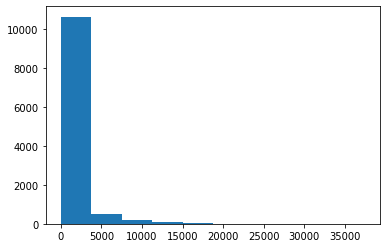

In [114]:
plt.hist(df_data['sum>0'].values)

### thres에 따른 pod incidence rate (0~10분)

In [45]:
incids = [] # incidence of pod
for thres in bsr_thresholds:
    row_inc = []
    
    sums = df_data[f'sum_upper{thres}'].values
    row_inc.append(np.nanmean(df_data['POD'][sums == 0])*100)
    
    sums = df_data[f'sum_upper{thres}'].values
    row_inc.append(np.nanmean(df_data['POD'][(0 < sums) & (sums <= 60)])*100)
    
    sums = df_data[f'sum_upper{thres}'].values
    row_inc.append(np.nanmean(df_data['POD'][(60 < sums) & (sums <= 180)])*100)    
    
    sums = df_data[f'sum_upper{thres}'].values
    row_inc.append(np.nanmean(df_data['POD'][(180 < sums) & (sums <= 300)])*100)  
    
    sums = df_data[f'sum_upper{thres}'].values
    row_inc.append(np.nanmean(df_data['POD'][(300 < sums) & (sums < 600)])*100)      
    
    sums = df_data[f'sum_upper{thres}'].values
    row_inc.append(np.nanmean(df_data['POD'][600 == sums])*100)    
    
    incids.append(row_inc)

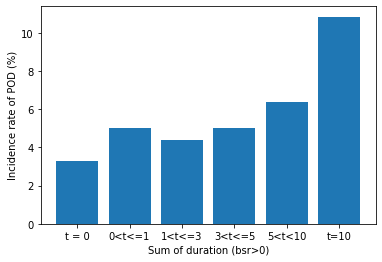

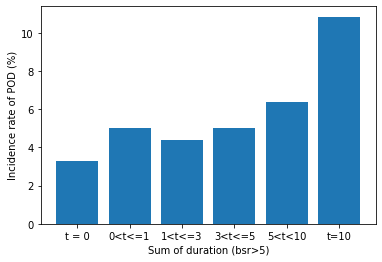

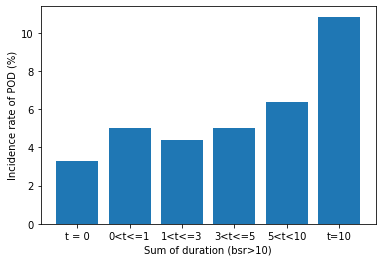

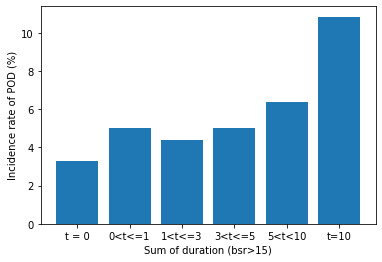

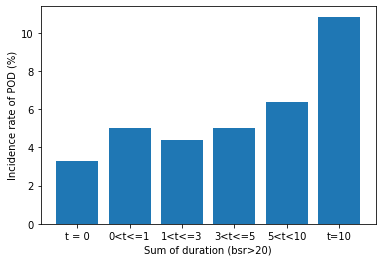

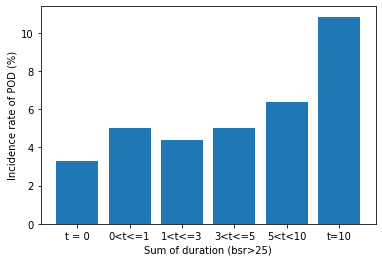

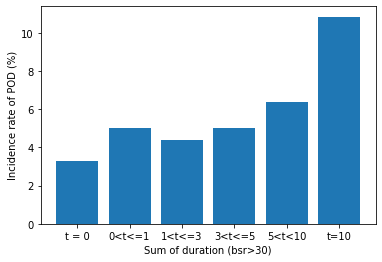

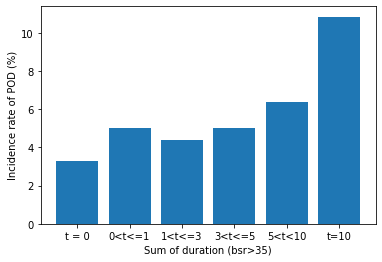

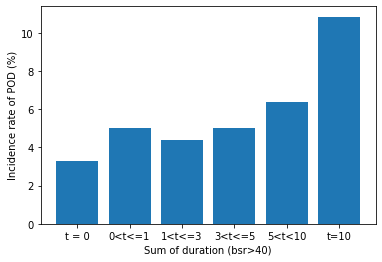

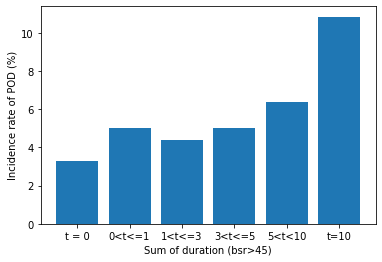

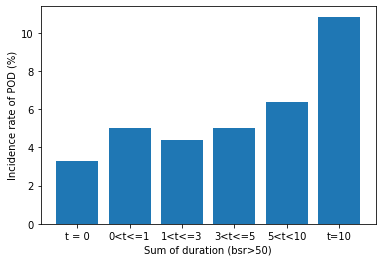

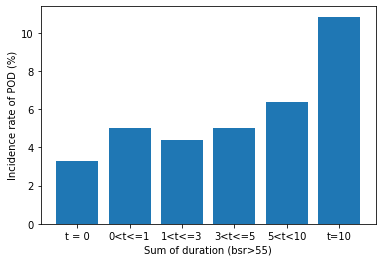

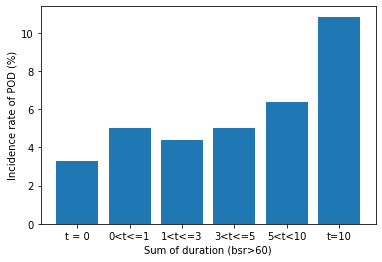

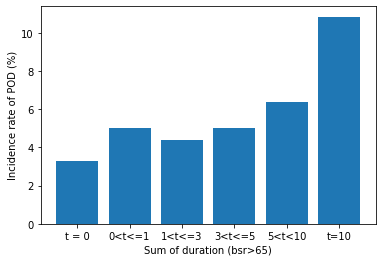

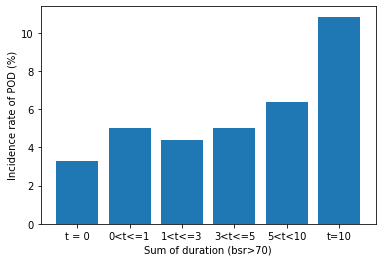

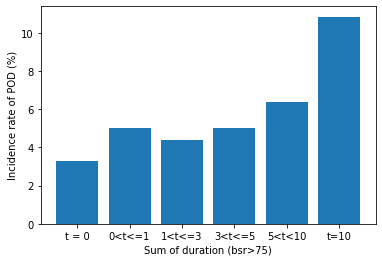

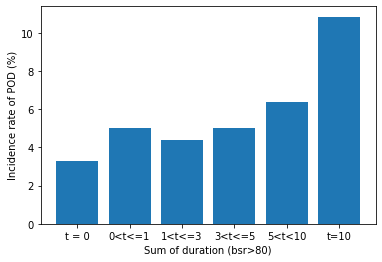

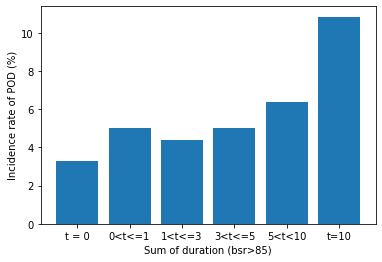

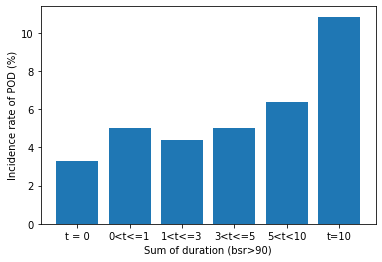

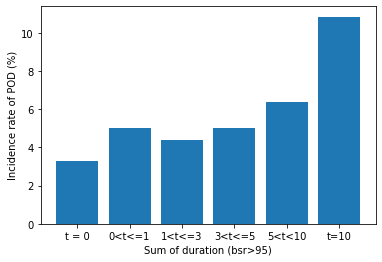

In [60]:
import matplotlib.pyplot as plt


for thres in bsr_thresholds:
    plt.bar(np.arange(len(incids[0])), incids[0])
    plt.xticks(np.arange(len(incids[0])), ['t = 0', '0<t<=1', '1<t<=3', '3<t<=5', '5<t<10', 't=10'])
    plt.xlabel(f'Sum of duration (bsr>{thres})')
    plt.ylabel('Incidence rate of POD (%)')
    plt.show()

### thres에 따른 pod incidence rate (min 단위)

In [104]:
incids = [] # incidence of pod
bins = []

thres = 0
sums = df_data[f'sum>0'].values

#incids.append(np.nanmean(df_data['POD'][sums == 0])*100)

for i in range(300):
    sum_r = df_data['POD'][(i*60 < sums) & (sums <= (i+1)*60)]
    incids.append(np.nanmean(sum_r)*100)
    bins.append(len(sum_r))
     
sum_r = df_data['POD'][(sums > (i+1)*60)]
incids.append(np.nanmean(sum_r)*100)
bins.append(len(sum_r))

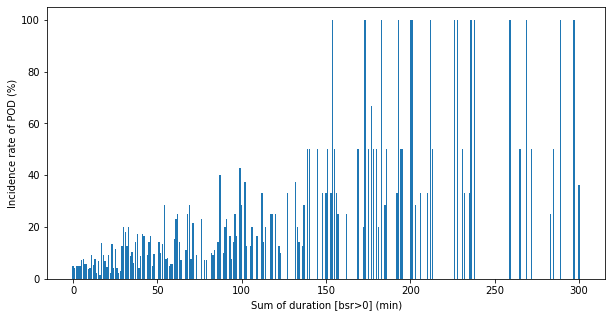

In [113]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(incids)), incids)
plt.xlabel(f'Sum of duration [bsr>{thres}] (min)')
plt.ylabel('Incidence rate of POD (%)')
plt.show()

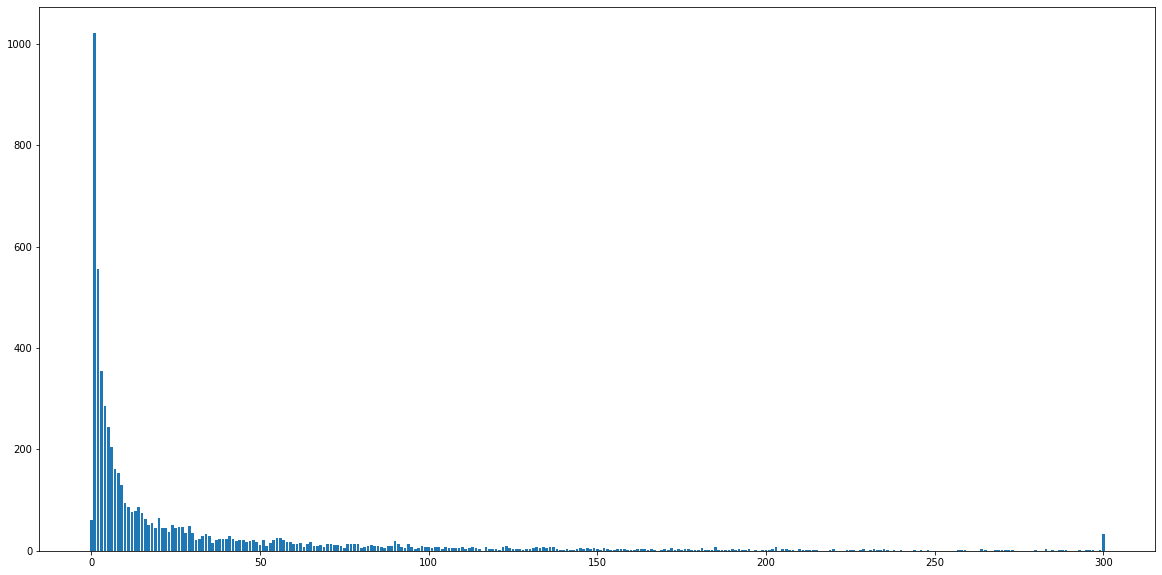

In [111]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(incids)), bins)
plt.show()

## BSR>0 threshold

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(df_data['sum>0'], df_data['POD'])

## odds ratio for sum(bsr > thres)

### unit(sec), max 400s)

In [11]:
# np.nanmean(bsr>thres)에 대한 odds ratio
odd_ratios = []
for thres in bsr_thresholds:
    c = 'sum_upper{}'.format(thres)
    model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
    res = model.fit()
    b = res.params[c]
    pval = res.pvalues[c]
    odd_ratios.append(np.exp(b))
    print('{}\tb={:.3f}, exp(b)={:.3f}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.207588
         Iterations 7
sum_upper0	b=0.003, exp(b)=1.003, pval=0.000
Optimization terminated successfully.
         Current function value: 0.209383
         Iterations 7
sum_upper5	b=0.003, exp(b)=1.003, pval=0.000
Optimization terminated successfully.
         Current function value: 0.210351
         Iterations 7
sum_upper10	b=0.003, exp(b)=1.003, pval=0.000
Optimization terminated successfully.
         Current function value: 0.210906
         Iterations 7
sum_upper15	b=0.003, exp(b)=1.003, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211401
         Iterations 7
sum_upper20	b=0.003, exp(b)=1.003, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211774
         Iterations 7
sum_upper25	b=0.003, exp(b)=1.003, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212373
         Iterations 7
sum_upper30	

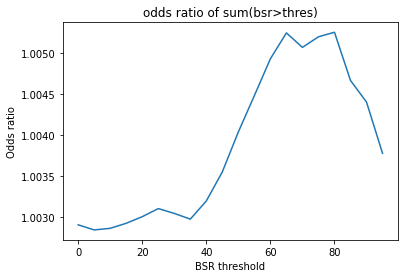

In [12]:
import matplotlib.pyplot as plt

plt.plot(bsr_thresholds, odd_ratios)
plt.title('odds ratio of sum(bsr>thres)')
plt.xlabel('BSR threshold')
plt.ylabel('Odds ratio')
plt.show()

### unit(sec), max 600s

In [25]:
# np.nanmean(bsr>thres)에 대한 odds ratio
odd_ratios = []
for thres in bsr_thresholds:
    c = 'sum_upper{}'.format(thres)
    model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
    res = model.fit()
    b = res.params[c]
    pval = res.pvalues[c]
    odd_ratios.append(np.exp(b))
    print('{}\tb={:.3f}, exp(b)={:.3f}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.207216
         Iterations 7
sum_upper0	b=0.002, exp(b)=1.002, pval=0.000
Optimization terminated successfully.
         Current function value: 0.209334
         Iterations 7
sum_upper5	b=0.002, exp(b)=1.002, pval=0.000
Optimization terminated successfully.
         Current function value: 0.210331
         Iterations 7
sum_upper10	b=0.002, exp(b)=1.002, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211012
         Iterations 7
sum_upper15	b=0.002, exp(b)=1.002, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211388
         Iterations 7
sum_upper20	b=0.002, exp(b)=1.002, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211840
         Iterations 7
sum_upper25	b=0.002, exp(b)=1.002, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212401
         Iterations 7
sum_upper30	

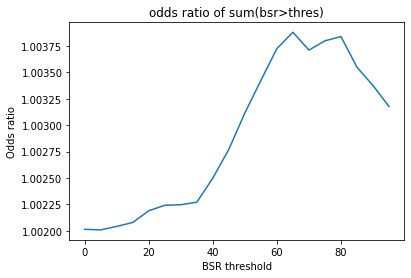

In [26]:
import matplotlib.pyplot as plt

plt.plot(bsr_thresholds, odd_ratios)
plt.title('odds ratio of sum(bsr>thres)')
plt.xlabel('BSR threshold')
plt.ylabel('Odds ratio')
plt.show()

### unit(min), max 10min

In [14]:
# np.nanmean(bsr>thres)에 대한 odds ratio
odd_ratios = []
for thres in bsr_thresholds:
    c = 'sum_upper{}'.format(thres)
    model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
    res = model.fit()
    b = res.params[c]
    pval = res.pvalues[c]
    odd_ratios.append(np.exp(b))
    print('{}\tb={:.3f}, exp(b)={:.3f}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.207216
         Iterations 7
sum_upper0	b=0.121, exp(b)=1.128, pval=0.000
Optimization terminated successfully.
         Current function value: 0.209334
         Iterations 7
sum_upper5	b=0.120, exp(b)=1.128, pval=0.000
Optimization terminated successfully.
         Current function value: 0.210331
         Iterations 7
sum_upper10	b=0.122, exp(b)=1.130, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211012
         Iterations 7
sum_upper15	b=0.125, exp(b)=1.133, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211388
         Iterations 7
sum_upper20	b=0.131, exp(b)=1.140, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211840
         Iterations 7
sum_upper25	b=0.134, exp(b)=1.144, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212401
         Iterations 7
sum_upper30	

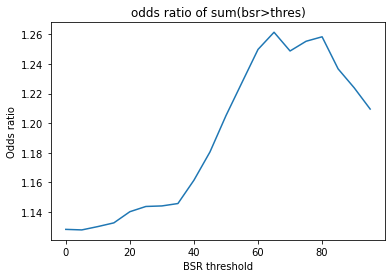

In [15]:
import matplotlib.pyplot as plt

plt.plot(bsr_thresholds, odd_ratios)
plt.title('odds ratio of sum(bsr>thres)')
plt.xlabel('BSR threshold')
plt.ylabel('Odds ratio')
plt.show()

### unit(min), no max

In [17]:
# np.nanmean(bsr>thres)에 대한 odds ratio
odd_ratios = []
for thres in bsr_thresholds:
    c = 'sum_upper{}'.format(thres)
    model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
    res = model.fit()
    b = res.params[c]
    pval = res.pvalues[c]
    odd_ratios.append(np.exp(b))
    print('{}\tb={:.3f}, exp(b)={:.3f}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.206722
         Iterations 7
sum_upper0	b=0.009, exp(b)=1.009, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211068
         Iterations 7
sum_upper5	b=0.010, exp(b)=1.010, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211921
         Iterations 7
sum_upper10	b=0.012, exp(b)=1.012, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212429
         Iterations 7
sum_upper15	b=0.013, exp(b)=1.013, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212848
         Iterations 7
sum_upper20	b=0.014, exp(b)=1.014, pval=0.000
Optimization terminated successfully.
         Current function value: 0.213178
         Iterations 7
sum_upper25	b=0.016, exp(b)=1.016, pval=0.000
Optimization terminated successfully.
         Current function value: 0.213484
         Iterations 7
sum_upper30	

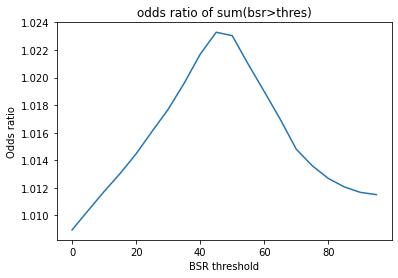

In [18]:
import matplotlib.pyplot as plt

plt.plot(bsr_thresholds, odd_ratios)
plt.title('odds ratio of sum(bsr>thres)')
plt.xlabel('BSR threshold')
plt.ylabel('Odds ratio')
plt.show()

## odds ratio for mean(bsr>thres)

### unit(min), no max

In [20]:
# np.nanmean(bsr>thres)에 대한 odds ratio
odd_ratios = []
for thres in bsr_thresholds:
    c = 'mean_upper{}'.format(thres)
    model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
    res = model.fit()
    b = res.params[c]
    pval = res.pvalues[c]
    odd_ratios.append(np.exp(b))
    print('{}\tb={:.3f}, exp(b)={:.3f}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.207208
         Iterations 8
mean_upper0	b=137.492, exp(b)=515452909339056119731372982846532979721324314292975663316992.000, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211078
         Iterations 7
mean_upper5	b=155.315, exp(b)=28354238304625334071655831634051548373275131347941120847868864757760.000, pval=0.000
Optimization terminated successfully.
         Current function value: 0.211839
         Iterations 7
mean_upper10	b=175.221, exp(b)=12520057331532923449704425843896414431109940528091586270444889774235139964928.000, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212378
         Iterations 7
mean_upper15	b=191.710, exp(b)=181298724472797388085726525361059143016246950987695292817914863654706686018948431872.000, pval=0.000
Optimization terminated successfully.
         Current function value: 0.212794
         Iterations 8
mean_upper2

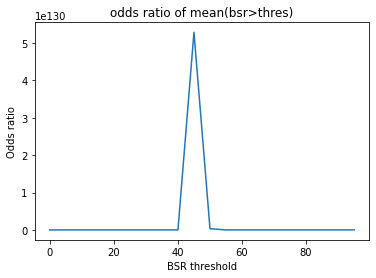

In [21]:
import matplotlib.pyplot as plt

plt.plot(bsr_thresholds, odd_ratios)
plt.title('odds ratio of mean(bsr>thres)')
plt.xlabel('BSR threshold')
plt.ylabel('Odds ratio')
plt.show()

In [23]:
df_data['mean_upper0']

0        0.000000
1        0.007043
2        0.000128
3        0.000000
4        0.000000
           ...   
11509    0.002065
11510    0.003193
11511    0.000000
11512    0.000114
11513    0.000000
Name: mean_upper0, Length: 11514, dtype: float64

## odds ratio for twa(time-weighted average)

In [3]:
import statsmodels.api as sm
from sklearn import metrics
from tqdm import tqdm

#bsr_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bsr_thresholds = np.arange(0,100,5)

odd_ratios = []
cums, outputs = [], []
for idx, row in tqdm(df_data.iterrows(), total = df_data.shape[0]):
    bsr = np.array(row['bsr_track'], dtype=np.float32)
    bsr = bsr[(bsr>=0) & (bsr<=100)]
    
    if len(bsr) < 10:
        print('caseid {}: no bsr'.format(row['fileid']))
        df_data.drop([idx], axis=0, inplace=True)
        continue

    # time weighted average of bsr
    df_data.loc[idx,f'twa'] = np.trapz(bsr) / len(bsr)
    df_data.loc[idx,f'tws'] = np.trapz(bsr)

100%|██████████| 11514/11514 [00:08<00:00, 1290.84it/s]


In [132]:
c = 'twa'
model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
res = model.fit()
b = res.params[c]
pval = res.pvalues[c]
print('{}\tb={:.3f}, exp(b)={:.3f}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.212093
         Iterations 7
twa	b=0.082, exp(b)=1.086, pval=0.000


<AxesSubplot:xlabel='twa', ylabel='POD'>

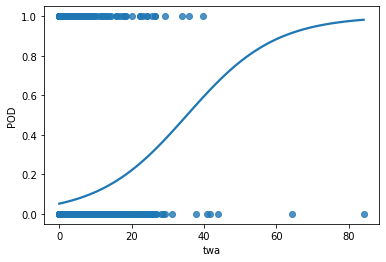

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(df_data['twa'], df_data['POD'])
#plt.xlabel('TWA')
#plt.ylabel('POD outcome')
sns.regplot(x=df_data['twa'], y=df_data['POD'],  logistic=True, ci=None)

In [139]:
twa= df_data['twa'].values
np.mean(twa<10)

0.9877540385617509

<AxesSubplot:ylabel='POD'>

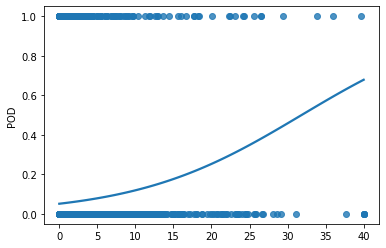

In [126]:
import seaborn as sns

twa = df_data['twa'].values
twa[twa>40] = 40


#plot logistic regression curve
sns.regplot(x=twa, y=df_data['POD'],  logistic=True, ci=None)

<AxesSubplot:xlabel='twa', ylabel='POD'>

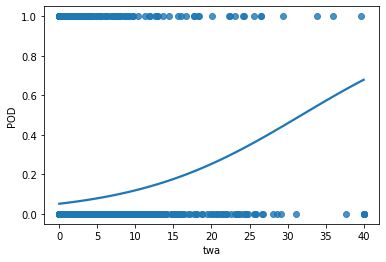

In [129]:
sns.regplot(x=df_data['twa'], y=df_data['POD'],  logistic=True, ci=None)

### time-weighted sum

In [137]:
c = 'tws'
model = sm.Logit(df_data['POD'], df_data[['intercept', c]])
res = model.fit()
b = res.params[c]
pval = res.pvalues[c]
print('{}\tb={:.3f}, exp(b)={:}, pval={:.3f}'.format(c, b, np.exp(b), pval))

Optimization terminated successfully.
         Current function value: 0.212015
         Iterations 7
tws	b=0.000, exp(b)=1.0000056655622562, pval=0.000


<AxesSubplot:xlabel='tws', ylabel='POD'>

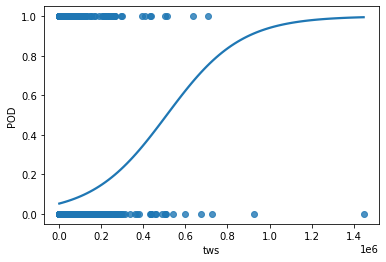

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.regplot(x=df_data['tws'], y=df_data['POD'],  logistic=True, ci=None)

<AxesSubplot:xlabel='tws', ylabel='POD'>

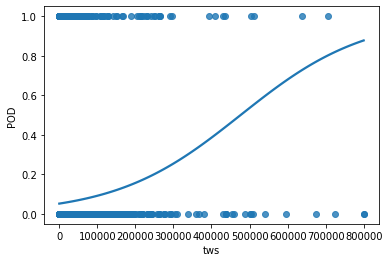

In [142]:
import seaborn as sns

tws = df_data['tws'].values
tws[tws>0.8*1000000] = 0.8 * 1000000

#plot logistic regression curve
sns.regplot(x=df_data['tws'], y=df_data['POD'],  logistic=True, ci=None)

In [146]:
op_times = df_data['bsr_track'].apply(lambda x: len(x))
np.mean(op_times)/60

206.02524752475247

# ROC

## Plot

TWA test set auroc: 0.644160713545253
TWS test set auroc: 0.6514734791543781
sum test set auroc: 0.6583646276045101
TWA test set auroc: 0.649282389947304


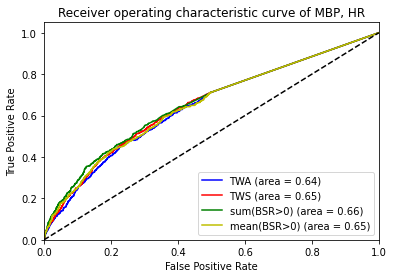

In [11]:
import numpy as np
from sklearn.metrics import roc_curve, auc, r2_score
import matplotlib.pyplot as plt


false_positive_rate, true_positive_rate, threshold = roc_curve(df_data['POD'], df_data['twa'])
roc_auc_twa = auc(false_positive_rate, true_positive_rate)
print('TWA test set auroc:', roc_auc_twa)

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(df_data['POD'], df_data['tws'])
roc_auc_tws = auc(false_positive_rate2, true_positive_rate2)
print('TWS test set auroc:', roc_auc_tws)

false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(df_data['POD'], df_data['sum>0'])
roc_auc_sum = auc(false_positive_rate3, true_positive_rate3)
print('sum test set auroc:', roc_auc_sum)

false_positive_rate4, true_positive_rate4, threshold = roc_curve(df_data['POD'], df_data['mean>0'])
roc_auc_mean = auc(false_positive_rate4, true_positive_rate4)
print('TWA test set auroc:', roc_auc_mean)

# plotting
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label='TWA (area = %0.2f)' % roc_auc_twa, c='b')
plt.plot(false_positive_rate2, true_positive_rate2, label='TWS (area = %0.2f)' % roc_auc_tws, c='r')
plt.plot(false_positive_rate3, true_positive_rate3, label='sum(BSR>0) (area = %0.2f)' % roc_auc_sum, c='g')
plt.plot(false_positive_rate4, true_positive_rate4, label='mean(BSR>0) (area = %0.2f)' % roc_auc_mean, c='y')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve of MBP, HR')
plt.legend(loc="lower right")
plt.show()

In [13]:
np.mean(df_data['sum>0'])/60

15.556916217937584

### Delong method

In [ ]:
from keras.models import model_from_json
import delong

#i for items / j for models
for j in range(3):
    load_path = loads[j]
    
    #model 부르기
    load_weight_path = load_path+'/weights.hdf5'

    print('loading model...', flush=True, end='')
    with open(load_path+"/model.json", 'r') as f_json:
        loaded_model_json = f_json.read()
    loaded_model = model_from_json(loaded_model_json)
    print('done')
    
    print('loading weights...', flush=True, end='')
    loaded_model.load_weights(load_weight_path)
    print('done')

    for i in range(3):
        result = 0 
        index=3*i+j
        x_test_model = x_tests[index]
        x = xs[i]
        y = ys[i]                
        
        y_pred = loaded_model.predict(x_test_model).flatten()
        
        #delong 계산하기
        actual = y
        preds_A = x
        preds_B = y_pred
        
        result = delong.delong_roc_test(actual, preds_A, preds_B)
        df_delong.iloc[i,j]=result

print(df_delong)        